Maximum number of spots: 9


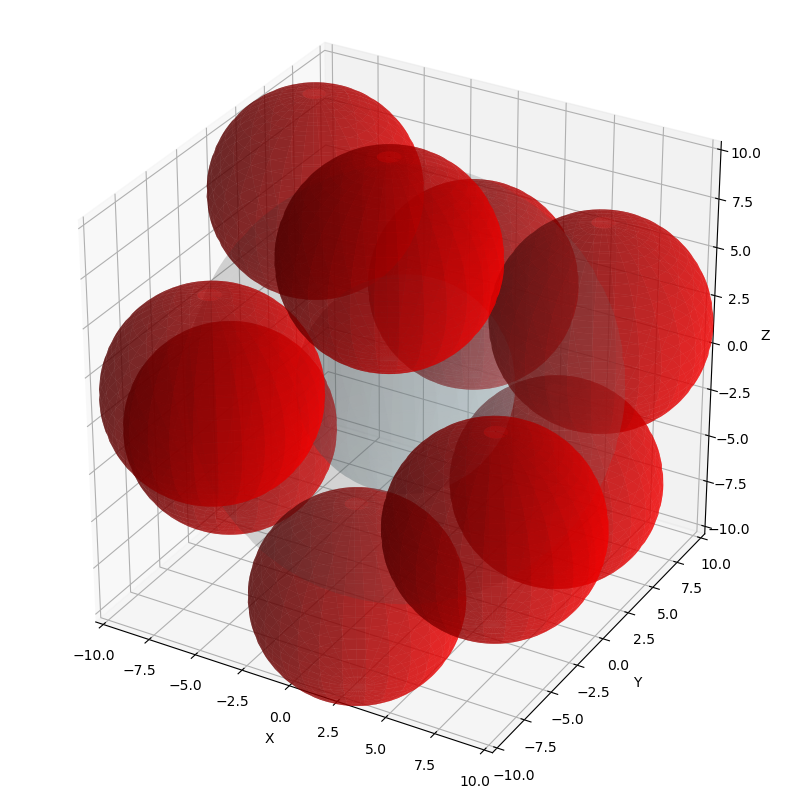

In [2]:
#Discalimer: created with help of ChatGPT, 2025
import numpy as np
import matplotlib.pyplot as plt

# ----------- Assumptions -----------
R1 = 5                 # radius of NP
spot_r = 5             # radius of spherical spots corresponding to protein beads with equal radius
R2 = R1+ spot_r        # radius of outer sphere 
min_dist = 2 * spot_r  # centers for protein spots do not overlap

# ----------- Fibonacci lattice on sphere -----------
def fibonacci_sphere(n):
    i = np.arange(0, n)
    phi = np.arccos(1 - 2 * (i + 0.5) / n)
    theta = np.pi * (1 + np.sqrt(5)) * (i + 0.5)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return np.vstack((x, y, z)).T

# ----------- Search for maximum evenly spaced points -----------
def find_max_uniform_pack(R2, min_dist, max_try=2000):
    for N in range(max_try, 0, -1):
        pts = fibonacci_sphere(N) * R2
        d = np.linalg.norm(pts[:, None, :] - pts[None, :, :], axis=2)
        np.fill_diagonal(d, 1e9)
        if np.min(d) >= min_dist:
            return pts
    return None

# Compute centers
centers = find_max_uniform_pack(R2, min_dist)
print("Maximum number of spots:", len(centers))

# ----------- Plotting -----------
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot inner sphere (visual)
theta = np.linspace(0, 2*np.pi, 60)
phi = np.linspace(0, np.pi, 60)
theta, phi = np.meshgrid(theta, phi)

x1 = R1*np.sin(phi)*np.cos(theta)
y1 = R1*np.sin(phi)*np.sin(theta)
z1 = R1*np.cos(phi)
ax.plot_surface(x1, y1, z1, alpha=0.2, color='lightblue')

# Plot outer sphere (visual)
x2 = R2*np.sin(phi)*np.cos(theta)
y2 = R2*np.sin(phi)*np.sin(theta)
z2 = R2*np.cos(phi)
ax.plot_surface(x2, y2, z2, alpha=0.1, color='gray')

# Plot spots
for cx, cy, cz in centers:
    xs = spot_r * np.sin(phi) * np.cos(theta) + cx
    ys = spot_r * np.sin(phi) * np.sin(theta) + cy
    zs = spot_r * np.cos(phi) + cz
    ax.plot_surface(xs, ys, zs, alpha=0.6, color='red', linewidth=0)

ax.set_box_aspect([1, 1, 1])
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel("X"), ax.set_ylabel("Y"), ax.set_zlabel("Z")

plt.show()
